# Graphviz Demo notebook. You must install a few things first. 

**This notebook won't work on mybinder because hierarchy magic isn't on pypi and thus can't be install by mybinder.org** 

``pip install git+https://github.com/tla/ipython-hierarchymagic.git``

``conda install graphviz``
(maybe pip install will work)

In [1]:
%load_ext hierarchymagic

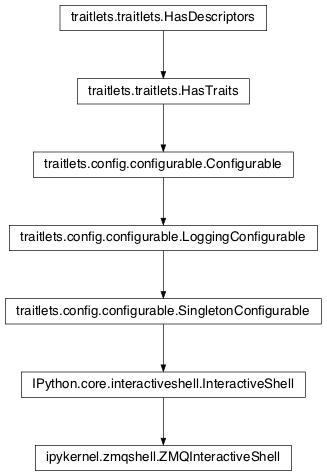

In [2]:
%hierarchy get_ipython()

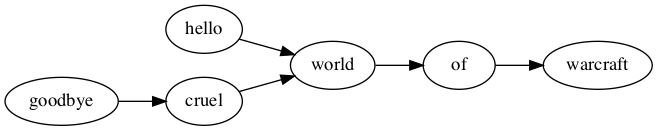

In [3]:
%%dot 

digraph G { 
    rankdir=LR;
    hello -> world;
    goodbye -> cruel -> world;
    world -> of -> warcraft;
}

In [4]:
from graphviz import Digraph

dot = Digraph(comment='The Round Table')
dot  #doctest: +ELLIPSIS

In [5]:
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

In [6]:
print(dot.source)  # doctest: +NORMALIZE_WHITESPACE

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


In [7]:
dot.render('test-output/round-table.gv', view=True)

'test-output/round-table.gv.pdf'

[Easier online tool](http://www.webgraphviz.com/)
to figure out your code (in dot)

[Better online tool](https://dreampuf.github.io/GraphvizOnline/) which also generates files for you. (Make sure to save the code for your archives!)

[Some examples](http://graphs.grevian.org/example), help, and renderer. 

You can upload your `gv` file to [this one](https://stamm-wilbrandt.de/GraphvizFiddle/#).

In [8]:
?dot.edge

In [9]:
Digraph?

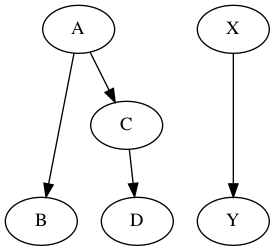

In [8]:
%%dot
digraph G { 
  rankdir = TB;
  subgraph {
    A -> B
    A -> C
    C -> D
    X -> Y
    // note that rank is used in the subgraph
    {rank = same; A; X;}
    {rank = same; B; D; Y;}
  } /* closing subgraph */
}

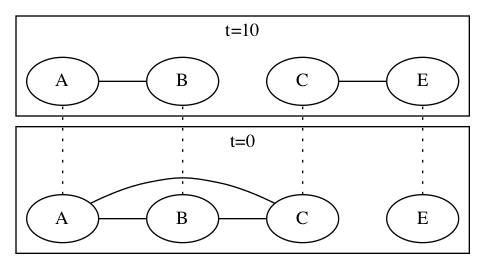

In [14]:
%%dot 
graph {
    rankdir=LR;
    subgraph cluster01 {
        label="t=0";
        a0 [label="A"];
        a1 [label="B"];
        a2 [label="C"];
        a5 [label="E"];
        a0 -- a1;
        a1 -- a2;
        a2 -- a5 [style=invis];
        a2 -- a0 [constraint=false];
    };

    subgraph cluster02
    {
        label="t=10"
        b0 [label="A"];
        b5 [label="E"];
        b1 [label="B"];
        b2 [label="C"];

        b0 -- b1;
        b1 -- b2 [style=invis];
        b2 -- b5;
    };

    edge[constraint=false];
    a0--b0 [style=dotted];
    a1--b1 [style=dotted];
    a2--b2 [style=dotted];
    a5--b5 [style=dotted];
}

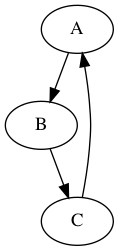

In [10]:
%%dot
digraph {
  A->B  
  B->C
  C->A
}

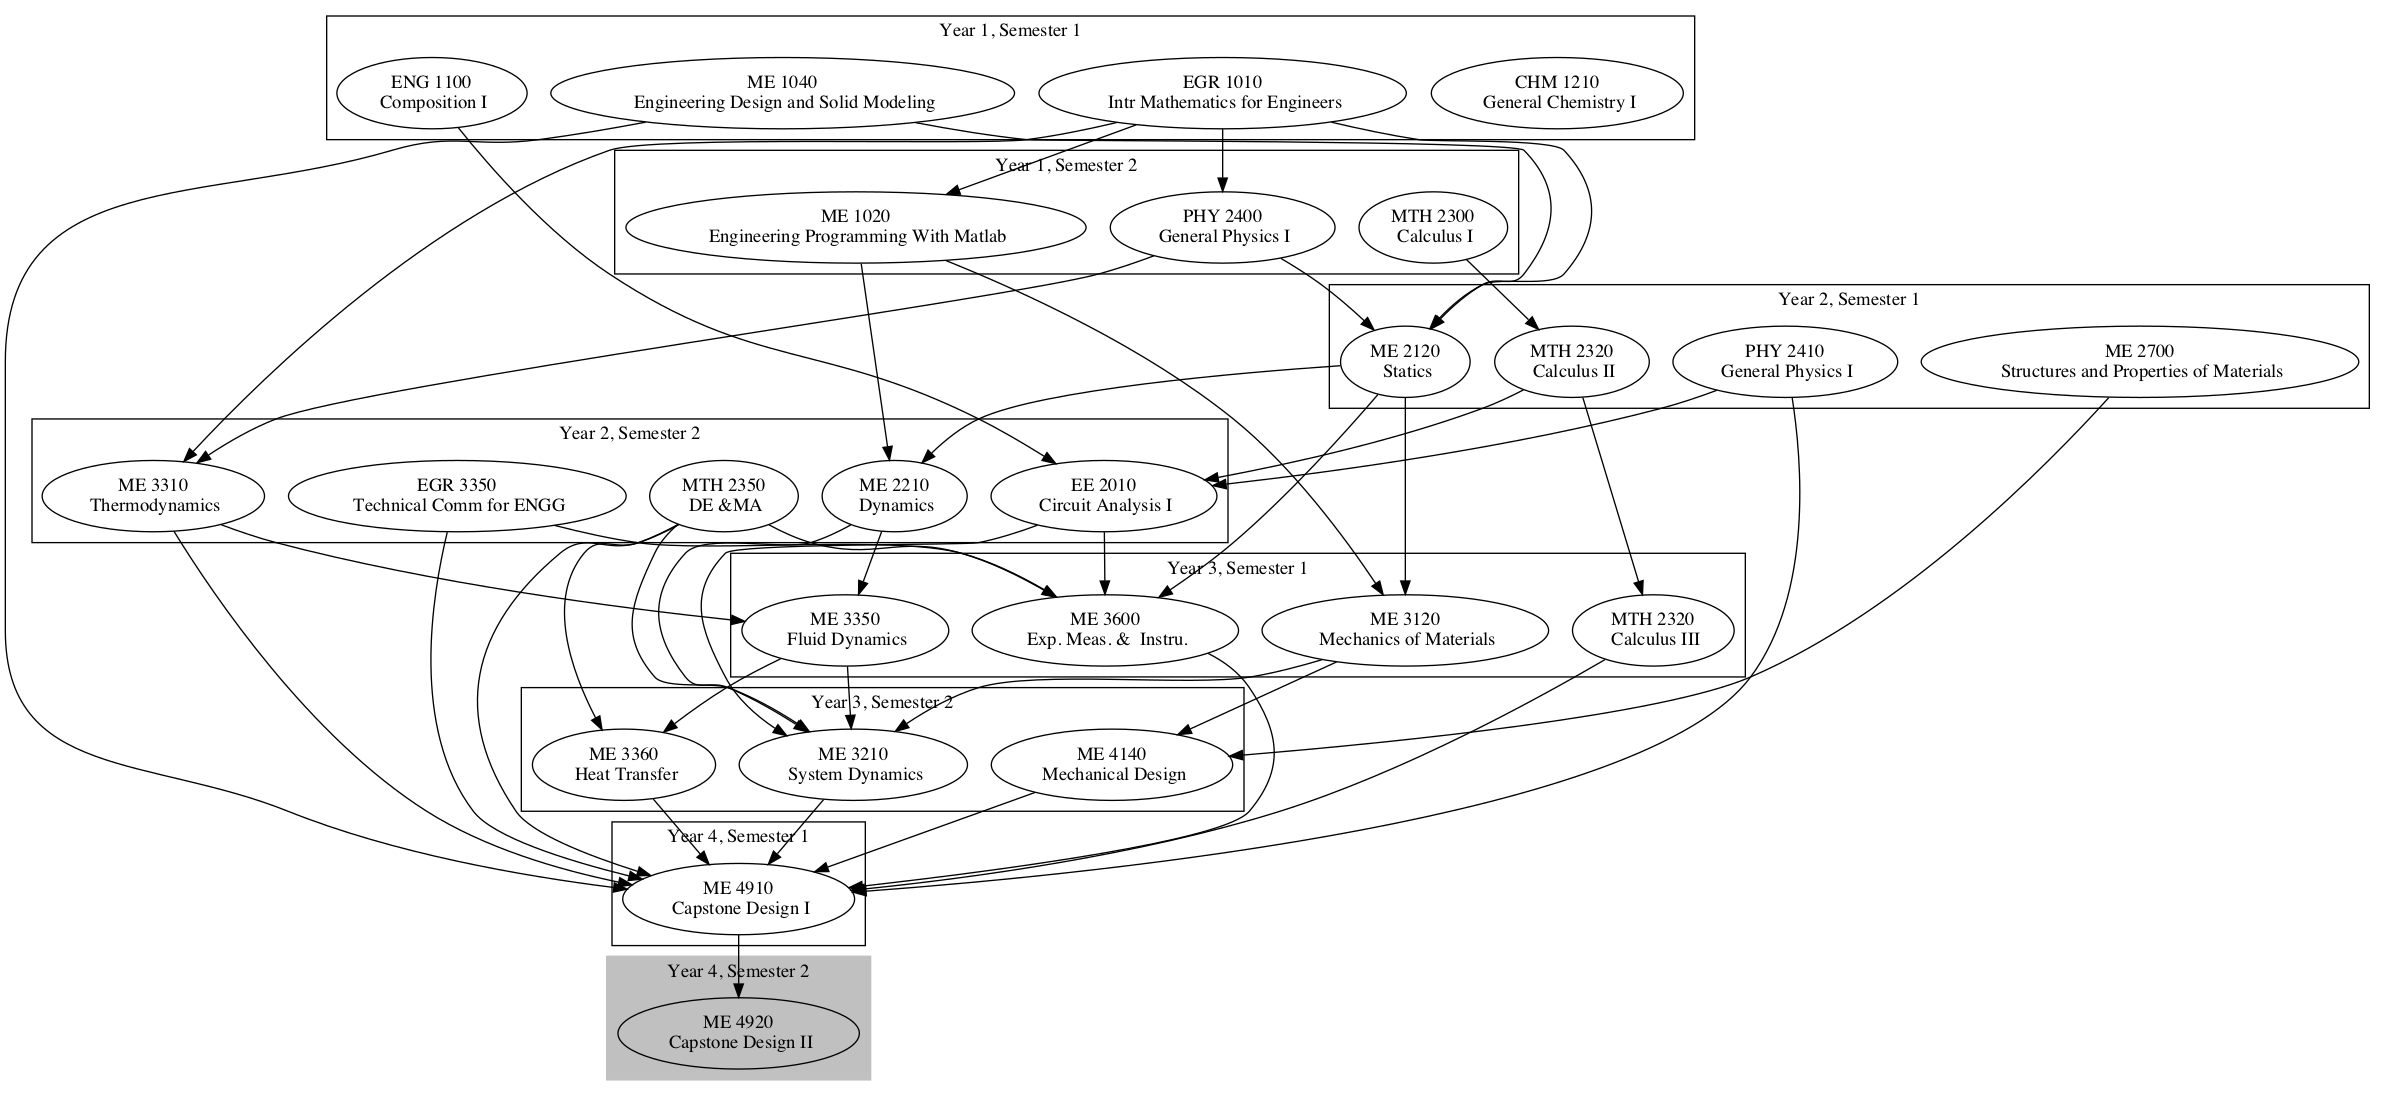

In [11]:
%%dot
digraph {
    subgraph cluster_0 {
    label="Year 1, Semester 1";
    CHM1210 [label = "CHM 1210\n General Chemistry I"] ;
    EGR1010 [label = "EGR 1010\n Intr Mathematics for Engineers"] ;
    ENG1100 [label = "ENG 1100\n Composition I"] ;
    ME1040 [label ="ME 1040\n Engineering Design and Solid Modeling"]
  }
        
    subgraph cluster_1 {
    label="Year 1, Semester 2";
    MTH2300 [label = "MTH 2300\n Calculus I"] ;
    PHY2400 [label = "PHY 2400\n General Physics I"] ;
    ME1020 [label ="ME 1020\n Engineering Programming With Matlab"]
  }
    
    subgraph cluster_2 {
    label="Year 2, Semester 1";
    ME2120 [label = "ME 2120\n Statics"] ;
    ME2700 [label = "ME 2700\n Structures and Properties of Materials"] ;
    MTH2310 [label = "MTH 2320\n Calculus II"] ;
    PHY2410 [label = "PHY 2410\n General Physics I"] ;
    }
    
    subgraph cluster_3 {
    label="Year 2, Semester 2";
    ME2210 [label = "ME 2210\n Dynamics"] ;
    EE2010  [label = "EE 2010\n Circuit Analysis I"];
    ME3310 [label = "ME 3310\n Thermodynamics"] ;
    MTH2350 [label = "MTH 2350\n DE &MA"] ;
    EGR3350 [label = "EGR 3350\n Technical Comm for ENGG"] ;
    }
    
    subgraph cluster_4 {
    label="Year 3, Semester 1";
    ME3120 [label = "ME 3120\n Mechanics of Materials"] ;
    ME3600  [label = "ME 3600\n Exp. Meas. &  Instru."];
    ME3350 [label = "ME 3350\n Fluid Dynamics"] ;
    MTH2320 [label = "MTH 2320\n Calculus III"] ;
    EGR3350 [label = "EGR 3350\n Technical Comm for ENGG"] ;
    }

    subgraph cluster_5 {
    label="Year 3, Semester 2";
    ME4140 [label = "ME 4140\n Mechanical Design"] ;
    ME3210  [label = "ME 3210\n System Dynamics"];
    ME3360 [label = "ME 3360\n Heat Transfer"] ;
    }
    
    subgraph cluster_6 {
    label="Year 4, Semester 1";
    ME4910 [label = "ME 4910\n Capstone Design I"] ;
    }
    
    subgraph cluster_7 {style=filled;
                        color="grey";
    label="Year 4, Semester 2";
    ME4920 [label = "ME 4920\n Capstone Design II"] ;
    }
    


EGR1010->ME1020;
EGR1010->PHY2400;
MTH2300->MTH2310;
{ME1040, EGR1010, PHY2400}->ME2120; 
{ENG1100, MTH2310, PHY2410}->EE2010    
{ME2120, ME1020}->ME2210;
{EGR1010, PHY2400}->ME3310;
{MTH2310}->MTH2320;
{ME1020, ME2120}->ME3120;
{EE2010, EGR3350, ME2120, MTH2350}->ME3600;
{ME2210, ME3310}->ME3350;
    
{ME3350, MTH2350}->ME3360;
{EE2010, ME2210, ME3120, ME3350, MTH2350}->ME3210;
{ME2700, ME3120}->ME4140;
    
{ME1040, ME3210, ME3310, ME3360, ME3600, ME4140, EGR3350, MTH2320, MTH2350, PHY2410}->ME4910;
    
ME4910->ME4920;
}

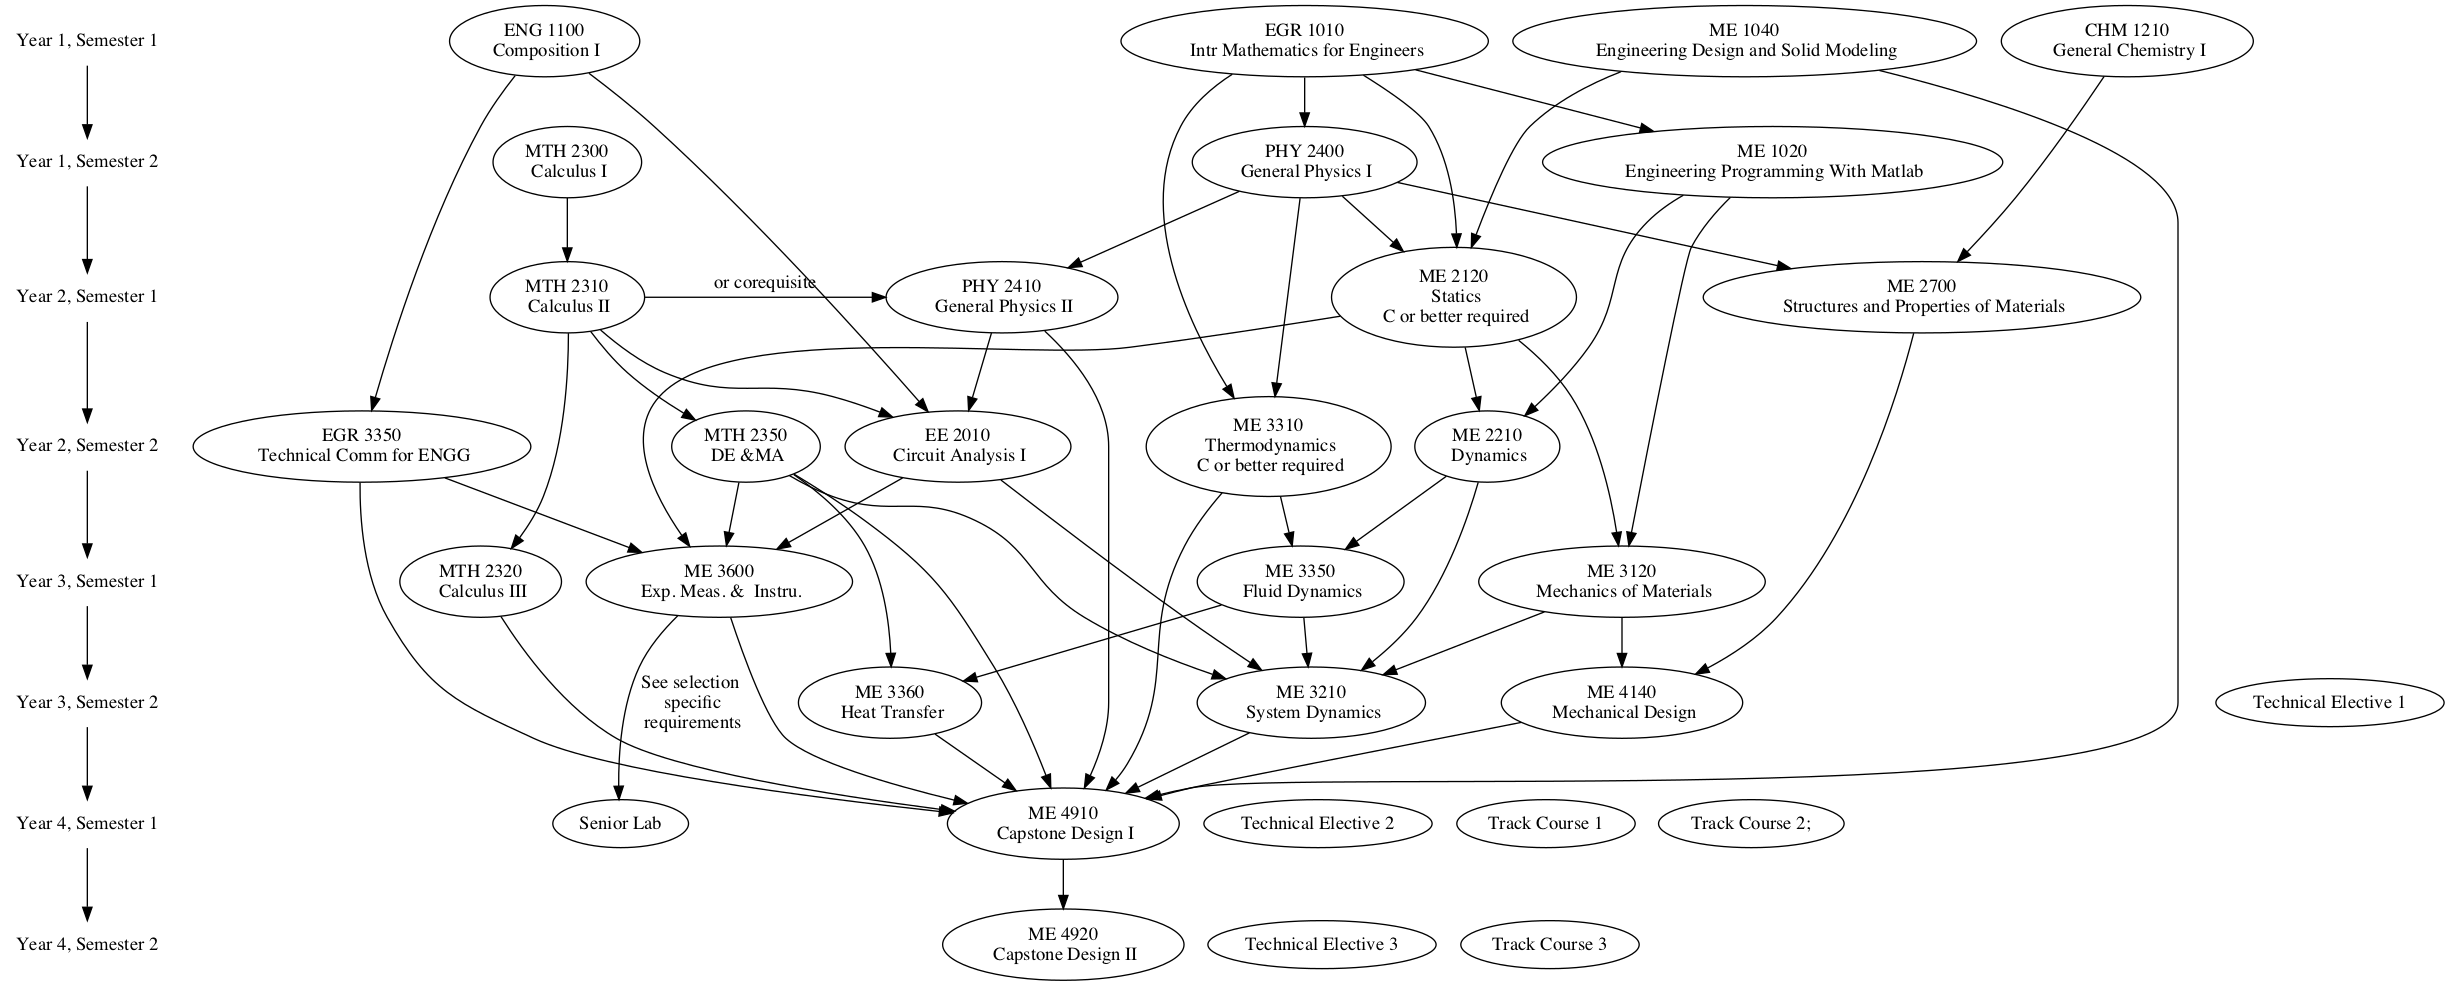

In [12]:
%%dot
digraph {
    
    
    { rank = same;
    Y1S1 [label ="Year 1, Semester 1", shape = none];
    CHM1210 [label = "CHM 1210\n General Chemistry I"] ;
    EGR1010 [label = "EGR 1010\n Intr Mathematics for Engineers"] ;
    ENG1100 [label = "ENG 1100\n Composition I"] ;
    ME1040 [label ="ME 1040\n Engineering Design and Solid Modeling"];
  }
        
    { rank = same;
    Y1S2 [label ="Year 1, Semester 2", shape = none];
    MTH2300 [label = "MTH 2300\n Calculus I"] ;
    PHY2400 [label = "PHY 2400\n General Physics I"] ;
    ME1020 [label ="ME 1020\n Engineering Programming With Matlab"]
  }
    
    { rank = same;
     Y2S1 [label ="Year 2, Semester 1", shape = none];
    ME2120 [label = "ME 2120\n Statics\n C or better required"] ;
    ME2700 [label = "ME 2700\n Structures and Properties of Materials"] ;
    MTH2310 [label = "MTH 2310\n Calculus II"] ;
    PHY2410 [label = "PHY 2410\n General Physics II"] ;
    }
    
    { rank = same;
    Y2S2 [label ="Year 2, Semester 2", shape = none];
    ME2210 [label = "ME 2210\n Dynamics"] ;
    EE2010  [label = "EE 2010\n Circuit Analysis I"];
    ME3310 [label = "ME 3310\n Thermodynamics\n C or better required"] ;
    MTH2350 [label = "MTH 2350\n DE &MA"] ;
    EGR3350 [label = "EGR 3350\n Technical Comm for ENGG"] ;
    }
    
    { rank = same;
    Y3S1 [label ="Year 3, Semester 1", shape = none] ;
    ME3120 [label = "ME 3120\n Mechanics of Materials"] ;
    ME3600  [label = "ME 3600\n Exp. Meas. &  Instru."];
    ME3350 [label = "ME 3350\n Fluid Dynamics"] ;
    MTH2320 [label = "MTH 2320\n Calculus III"] ;
    }


    { rank = same;
    Y3S2 [label ="Year 3, Semester 2", shape = none];
    ME4140 [label = "ME 4140\n Mechanical Design"] ;
    ME3210  [label = "ME 3210\n System Dynamics"];
    ME3360 [label = "ME 3360\n Heat Transfer"] ;
    "Technical Elective 1";
    }
    
    { rank = same;
    Y4S1 [label ="Year 4, Semester 1", shape = none];
    ME4910 [label = "ME 4910\n Capstone Design I"] ;
    "Senior Lab";
    "Technical Elective 2";
    "Track Course 1";
    "Track Course 2;"
    }
    
    { rank = same;
     Y4S2 [label ="Year 4, Semester 2", shape = none] ;
    ME4920 [label = "ME 4920\n Capstone Design II"] ;
    "Technical Elective 3";
    "Track Course 3"
    }
    
    node [shape = box];
    {node [shape=box, fontsize=18, constraint=true];/*the time-line graph*/
     Y1S1-> 
     Y1S2-> 
     Y2S1-> 
     Y2S2->
     Y3S1-> 
     Y3S2-> 
     Y4S1-> 
     Y4S2}

//Year 1, Semester 2
EGR1010->ME1020;
EGR1010->PHY2400;
    
//Year 2, Semester 1    
{ME1040, EGR1010, PHY2400}->ME2120;
{CHM1210, PHY2400} ->ME2700;    
MTH2300->MTH2310;
PHY2400->PHY2410;
MTH2310->PHY2410 [label="or corequisite"];

//Year 2, Semester 2   
{ENG1100, MTH2310, PHY2410}->EE2010;    
{ME2120, ME1020}->ME2210;
{EGR1010, PHY2400}->ME3310;
MTH2310->MTH2350;
ENG1100->EGR3350;
    
//Year 3, Semester 1    
{MTH2310}->MTH2320;
{ME1020, ME2120}->ME3120;
{EE2010, EGR3350, ME2120, MTH2350}->ME3600;
{ME2210, ME3310}->ME3350;
    
//Year 3, Semester 2    
{ME3350, MTH2350}->ME3360;
{EE2010, ME2210, ME3120, ME3350, MTH2350}->ME3210;
{ME2700, ME3120}->ME4140;
    
//Year 4, Semester 1    
{ME1040, ME3210, ME3310, ME3360, ME3600, ME4140, EGR3350, MTH2320, MTH2350, PHY2410}->ME4910;
ME3600->"Senior Lab" [ label = "See selection\n specific\n requirements"]
    
//Year 4, Semester 2    
ME4910->ME4920;

}

In [18]:
from graphviz import Source
graph = Source.from_file('ME.gv')
graph.render('ME.gv', view=True)

'ME.gv.pdf'

# Materials Science Major

In [1]:
%%dot
digraph {
    
    
    { rank = same;
    Y1S1 [label ="Year 1, Semester 1", shape = none];
    CHM1210 [label = "CHM 1210\n General Chemistry I"] ;
    EGR1010 [label = "EGR 1010\n Intr Mathematics for Engineers"] ;
    ENG1100 [label = "ENG 1100\n Composition I"] ;
    ME1040 [label ="ME 1040\n Engineering Design and Solid Modeling"];
  }
        
    { rank = same;
    Y1S2 [label ="Year 1, Semester 2", shape = none];
    ME1020 [label ="ME 1020\n Engineering Programming With Matlab"]
    MTH2300 [label = "MTH 2300\n Calculus I"] ;
    PHY2400 [label = "PHY 2400\n General Physics I"] ;
  }
    
    { rank = same;
     Y2S1 [label ="Year 2, Semester 1", shape = none];
    ME2120 [label = "ME 2120\n Statics\n C or better required"] ;
    ME2600 [label = "ME 2600\n Metallography"];
    ME2700 [label = "ME 2700\n Structures and Properties of Materials\n C or better required"] ;
    MTH2310 [label = "MTH 2320\n Calculus II"] ;
    PHY2410 [label = "PHY 2410\n General Physics II"] ;
    }
    
    { rank = same;
    Y2S2 [label ="Year 2, Semester 2", shape = none];
    EE2010  [label = "EE 2010\n Circuit Analysis I"];
    ME3120 [label = "ME 3120\n Mechanics of Materials"] ;
    MTH2350 [label = "MTH 2350\n DE &MA"] ;
    EGR3350 [label = "EGR 3350\n Technical Comm for ENGG"] ;
    }
    
    { rank = same;
    Y3S1 [label ="Year 3, Semester 1", shape = none] ;
    MTH2320 [label = "MTH 2320\n Calculus III"] ;
    ME3600  [label = "ME 3600\n Exp. Meas. &  Instru."];
    ME3750 [label = "ME 3750\n Thermodynamics of Materials"] ;
    ME4720 [label = "ME 4720\n Enginering Polymers"] ;
    }


    { rank = same;
    Y3S2 [label ="Year 3, Semester 2", shape = none];
    ME3760 [label = "ME 3760\n Diffusion and Kinetics"] ;
    ME4750 [label = "ME 4750\n Materials Characterization"] ;
    }
    
    { rank = same;
    Y4S1 [label ="Year 4, Semester 1", shape = none];
    ME4910 [label = "ME 4910\n Capstone Design I"] ;
    ME4730 [label = "ME 4730\n Engineering Ceramics"] ;
    ME4770 [label = "ME 4770\n Mechanical Behavior of Metals"] ;
    ME4620 [label = "ME4620\n Mechanical Testing Lab"]
    }
    
    { rank = same;
     Y4S2 [label ="Year 4, Semester 2", shape = none] ;
    ME4920 [label = "ME 4920\n Capstone Design II"];
    ME4700 [label = "ME 4700\n Structure and Properties of Materials"];
    ME4740 [label = "ME 4740\n Materials Selection and Failure Analysis"];
    }
    
    node [shape = box];
    {node [shape=box, fontsize=18, constraint=true];/*the time-line graph*/
     Y1S1-> 
     Y1S2-> 
     Y2S1-> 
     Y2S2->
     Y3S1-> 
     Y3S2-> 
     Y4S1-> 
     Y4S2}

//Year 1, semester 2
EGR1010->ME1020;
EGR1010->PHY2400;
    
//Year 2, Semester 1    
{ME1040, EGR1010, PHY2400}->ME2120; 
ME2700->ME2600 [label="or corequisite"];
{CHM1210, PHY2400}->ME2700;
MTH2300->MTH2310;
PHY2400->PHY2410;
MTH2310->PHY2410 [label="or corequisite"];

//Year 2, Semester 2
{ENG1100, MTH2310, PHY2410}->EE2010;    
ENG1100->EGR3350;
{ME1020, ME2120}->ME3120;
MTH2310->MTH2350;
    
//Year 3, Semester 1    
{MTH2310}->MTH2320;
{EE2010, EGR3350, ME2120, MTH2350}->ME3600;
{ME2700}->ME3750;
ME2700->ME4720;    

//Year 3, Semester 2
ME3750->ME3760;
{ME2600, ME2700}->ME4750;

//Year 4, Semester 1    
{ME1040, ME3600, ME4620, ME4720, EGR3350, MTH2320, MTH2350, PHY2410}->ME4910;
ME2700->ME4730;
{ME2700, ME3120}->ME4770;
{ME2700, ME3120, ME3600}->ME4620;
    
//Year 4, Semester 2    
ME4910->ME4920;
{ME2700, MTH2320, MTH2350}->ME4700;
{ME2700, ME3120}->ME4740;
ME4620->ME4740 [label = "or corequisite"]
}

UsageError: Cell magic `%%dot` not found.


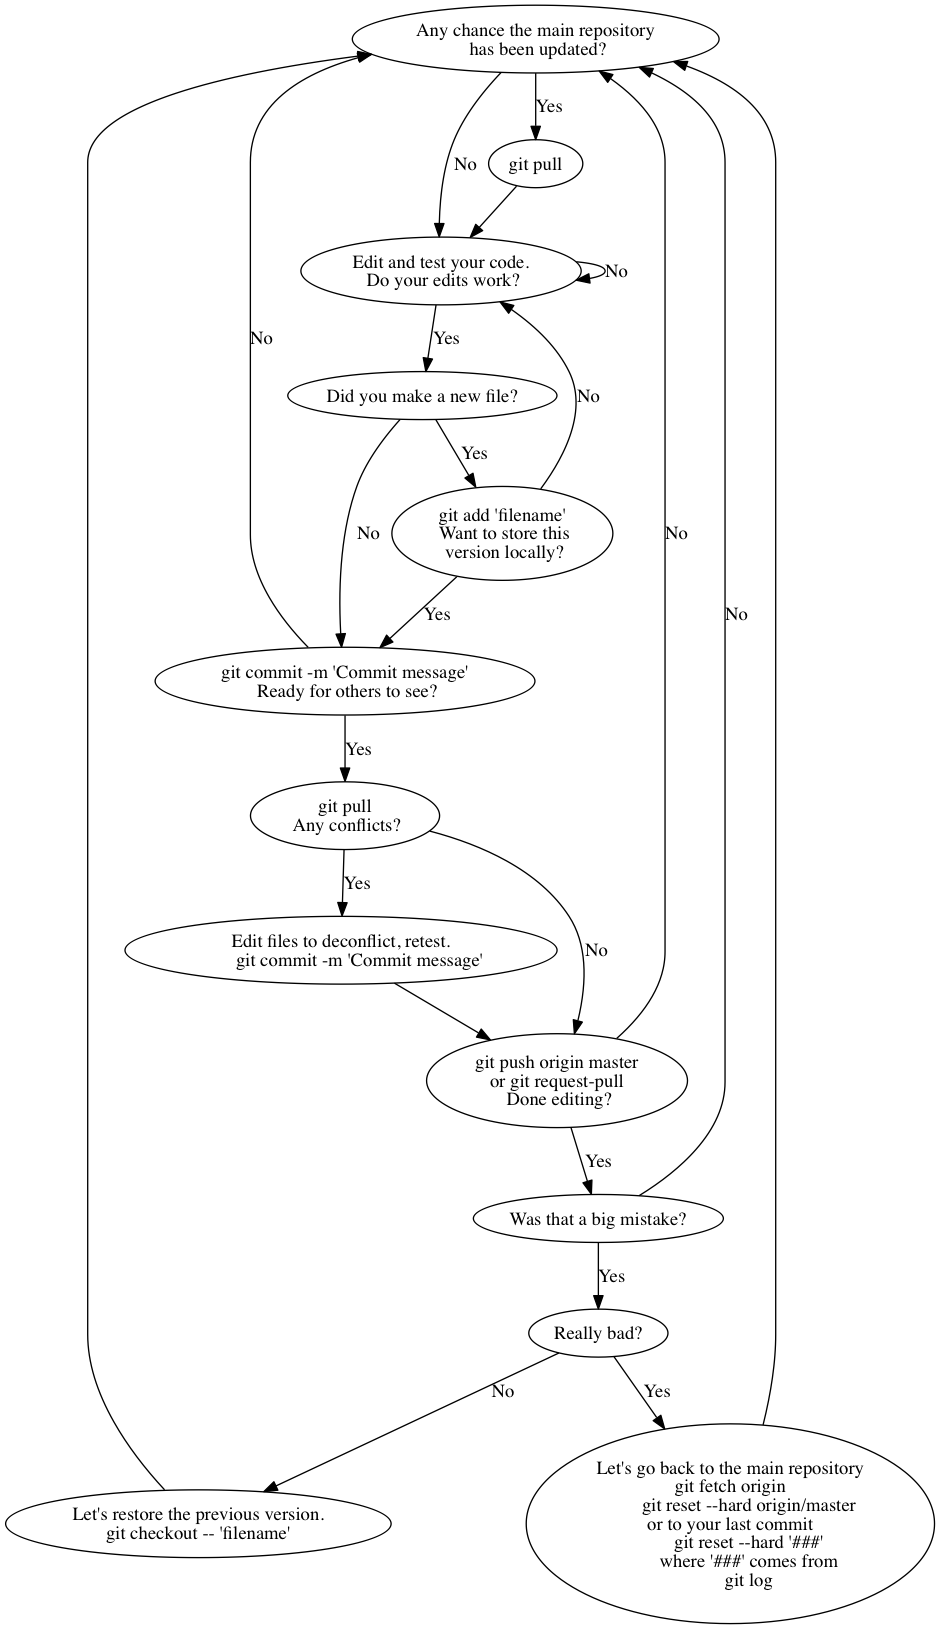

In [67]:
%%dot
digraph {
    
    Aa [label = "Any chance the main repository\n has been updated?"]
    Ab [label = "git pull"]
    A [label = "Edit and test your code.\n Do your edits work?"]
    B [label = "Did you make a new file?"] ;
    Ba [label = "git add 'filename'\n Want to store this\n version locally?"]
    Bb [label = "git commit -m 'Commit message'\n Ready for others to see?"]
    Bc [label = "git pull\n Any conflicts?"]
    Bd [label = "Edit files to deconflict, retest.
        git commit -m 'Commit message'"]
    C [label = "git push origin master\nor git request-pull\n Done editing?"]
    Ca [label = "Was that a big mistake?"]
    Cb [label = "Really bad?"]
    D [label = "Let's restore the previous version.\ngit checkout -- 'filename'"]
    Db [label = "Let's go back to the main repository\ngit fetch origin
        git reset --hard origin/master
        Or to your last commit
        git reset --hard '###'
        where '###' comes from
        git log"]
    #E [label = "Let's restore the previous version.\ngit checkout -- 'filename'"]
    #F [label = ""]
    A->B [label = "Yes"]
    B->Ba [label = "Yes"]
    B->Bb [label = "No"]
    Aa->A [label = "No"]
    Aa->Ab [label = "Yes"]
    Ab->A 
    A->A [label = "No"]
    Ba->Bb [label = "Yes"]
    Ba->A [label = "No"]
    Bb->Bc [label = "Yes"]
    Bc->Bd [label = "Yes"]
    Bb->Aa [label = "No"]
    Bd->C
    Bc->C [label ="No"]
    #B:ne->A:se [label = "No"]
    C->Aa [label = "No"]
    C->Ca [label = "Yes"]
    Ca->Cb [label = "Yes"]
    Cb->Db [label = "Yes"]
    Cb->D [label = "No"]
    Ca->Aa[label = "No"]
    D->Aa 
    Db->Aa
    #E->Aa [label = "No"]
}